In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange
import scipy.special as spc

# Dice game stopping at any perfect square

Asked during interview.

Throw a dice and sum up the draws until the sum is a perfect square, or you stop the game winning the budget.

**Q1: _say you survived till some $b$, do you keep throwing?_**

Imagine $b$ is between two squares, $(n-1)^2$ and $n^2$. Then, one would throw until $b\in\{n^2-6,..,n^2-1\}$.
Throwing again implies throwing until $b\in\{(n+1)^2-6,..,(n+1)^2-1\}$ _if_ $n^2$ was never scored, or hitting $n^2$ and losing.
In terms of rational player, the game stopping rule is:
$$\mathbb E[n^2-c]\ge\mathbb E[(n+1)^2-c]=\mathbb E[(n+1)^2-c|n^2\text{ never scored}]\mathbb P(n^2\text{ never scored}),$$
where in both cases $c$ has expected value 3.5.
$$
n^2 - 3.5 \ge =\frac 56\left(n^2+1+2n-3.5\right)\implies n^2-10n-7.5\ge0.
$$
This inequality is true for $n\ge 10$, so we should stop if $n=94,..,99$.

**Oss:** computing the value function you see that at the states from 75 to 80 the game must be stopped. That's because the reasoning above does not account for the distribution of outcomes, but just assumes that one terminates in 94,..,99 uniformly.

**Q2: _what is the average win of this game?_**

Use a dynamic programming approach to compute a value function.
The game is a Markov chain whose states are the budget we are holding in each state.
Terminating states are for sure the perfect squares and 94,..,99.

Just compute recursively:
$$ v(k) = \max\left\{k,\frac 16\sum_{i=k+1}^{k+6} v(i)\right\},$$
the searched value is $v(0)=7.175$

**Q3: _how many shots does it averagely take?_**

Same way, but think it differently:

$$ N(k) = \begin{cases} 0 & v(k)=k \quad\text{(hitting Snell envelope)} \\
                        1+\frac 16\sum_{i=k+1}^{k+6} N(i) & \text{otherwise} \end{cases}$$

In [2]:
squares = [ i**2 for i in range(1,12) ]
maxn = squares[-1]-1
v = [ 0 ]*(maxn+1)
N = [ 0 ]*(maxn+1)

for k in range(maxn,-1,-1):
    if k in squares:
        continue
    if k > maxn-6:
        v[k] = k
        continue
    v[k] = max(k,sum(v[k+1:k+7])/6)
    
for k in range(maxn,-1,-1):
    if k in squares or k == v[k]:
        continue
    if v[k] > k:
        N[k] = 1+sum(N[k+1:k+7])/6

print('expected win: {:5.3f} and time: {:5.3f}'.format(v[0],N[0]))

expected win: 7.175 and time: 4.356


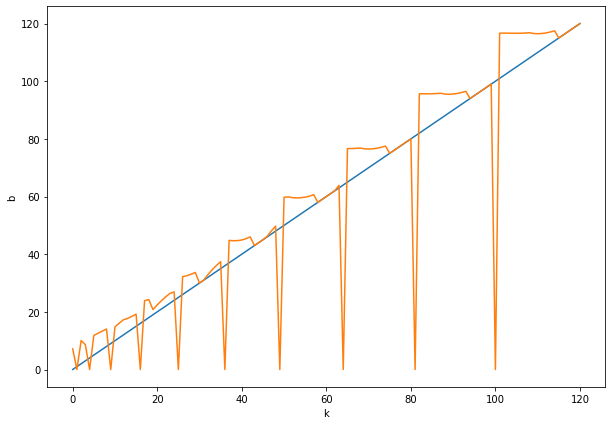

In [3]:
plt.figure(figsize=(10,7))
plt.plot([k for k in range(len(v))], label = 'y=x')
plt.plot(v,label = 'Snell envelope')
plt.xlabel('k')
plt.ylabel('b')
plt.show()

In [4]:
squares = [ i**2 for i in range(1,11) ]
games = 1000000

avgb = 0
avgc = 0
f = []
for game in trange(games,desc = 'games: '):
    b = 0
    c = 0
    while True:
        d = np.random.randint(1,7)
        b += d
        c += 1
        if b in squares:
            f.append(b)
            b = 0
            break
        if b == v[b]:
            f.append(b)
            break
    avgb += b
    avgc += c

print(avgb/games,avgc/games)


7.204137 4.362601


## Distribution of outcomes

In [16]:
import numpy as np

N = 10000


for maxn in range(10,16):
#maxn = 11
    f = maxn**2
    fp1 =(maxn+1)**2

    for k in range(f-1,f-7,-1):
        #print(k," fermo a ",f)
        l = np.zeros(6)
        for i in range(N):
            b = k
            pd = 0
            while True:
                d = np.random.randint(1,7)
                if b + d == f:
                    pd += 1
                    break
                b += d
                if b >= fp1 - 6:
                    l[b-(fp1-6)] += 1
                    break
        l = l/np.linalg.norm(l)
        pd /= N

        print(k,k>(fp1-np.linspace(1,6,6) @ l)*(1-pd))

99 False
98 False
97 False
96 False
95 False
94 False
120 False
119 False
118 False
117 False
116 False
115 False
143 False
142 False
141 False
140 False
139 False
138 False
168 False
167 False
166 False
165 False
164 False
163 False
195 False
194 False
193 False
192 False
191 False
190 False
224 False
223 False
222 False
221 False
220 False
219 False


In [14]:
maxn = 11
f = maxn**2
fp1 =(maxn+1)**2

for k in range(f-1,f-7,-1):
    print(k>(fp1-3.5)*5/6)

True
True
True
False
False
False
